# Background
This notebook is designed to import and visualise aggregated data from warehouse. Comments indicate where changes should be made by the user to make it specific to their project. Once entries have been made, the notebook can be run one cell at a time (Shift-Enter) or all together ('Run All' above).

In [1]:
import pandas as pd
from pathlib import Path

from warehouse.visualise.components.upset_plot import upsetplot_fig, create_mutations_dict
from warehouse.configure.configure import get_configuration_value

%matplotlib inline

# Set defaults

In [ ]:
data_dir = Path(get_configuration_value("output_folder"))

output_figs = True
figs_dir = data_dir / "figs"
if output_figs:
    figs_dir.mkdir(parents=True, exist_ok=True)

# Import Data

In [5]:
#Define folder paths
exp_dir = data_dir / "experimental"
sample_dir = data_dir / "sample"
seq_dir = data_dir / "sequence"

#Pull in data
bcf_df = pd.read_csv(seq_dir / "bcftools_samples_QC_pass.csv")
sample_set = pd.read_csv(data_dir / "sample_set.csv")
sample_data = pd.read_csv(sample_dir / "df.csv")
muts_dict = create_mutations_dict()
amp_uids_pass_QC_df = pd.read_csv(seq_dir / "amp_uids_pass_QC.csv")

# Upset Plots of mutations
Individual mutations are shown in rows, with candidate (light grey / orange) and validated (dark grey / red) mutations highlighted. Combinations are shown vertically with known combinations highlighted in colour. Wild-type (WT) is shown in green.

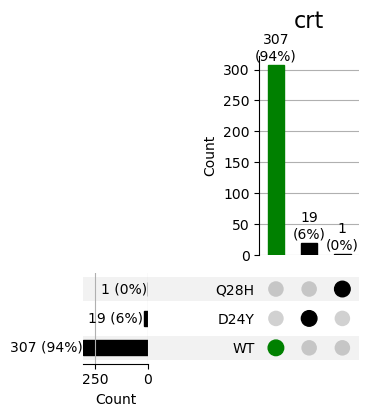

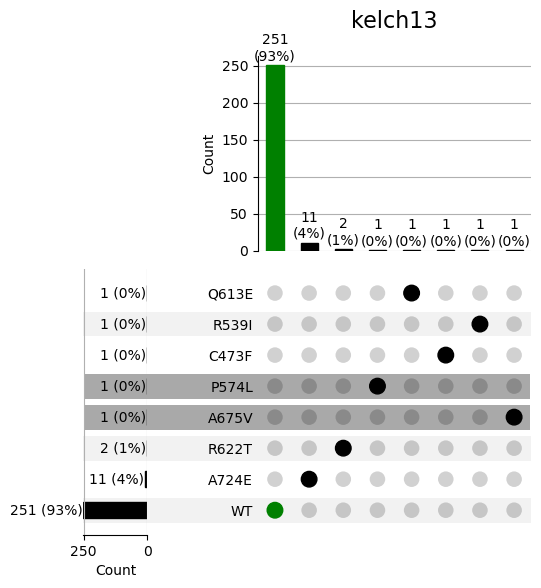

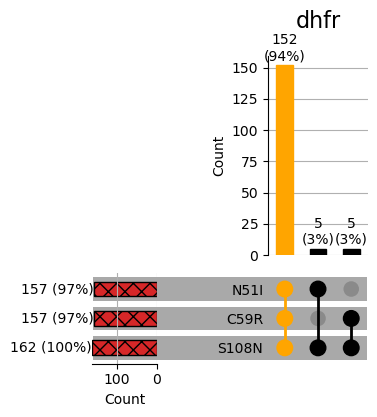

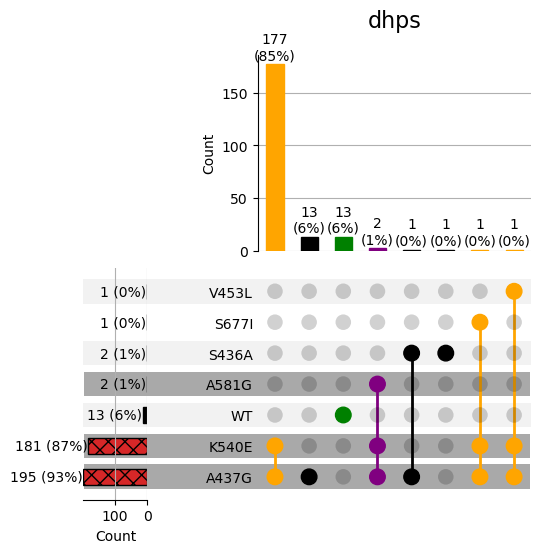

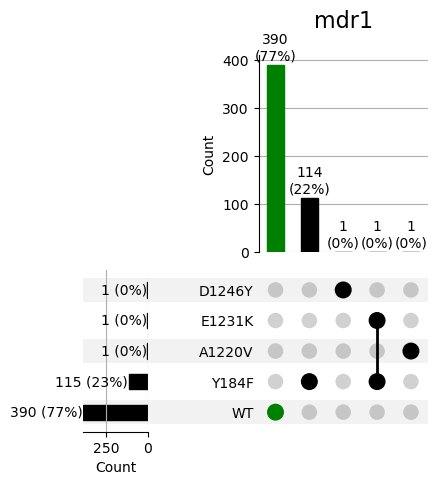

In [6]:
for gene in muts_dict.keys():
    fig = upsetplot_fig(
        variants_df=bcf_df,
        ids_passed_QC=amp_uids_pass_QC_df,
        gene=gene,
        muts_dict=muts_dict,
    )
    if output_figs:
        fig.savefig(figs_dir / gene, dpi=300)